In [32]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [58]:
def plot_trace(stage: str, name: str, iterations = 500, cycle = 50, plot_individual_reward = False):
    #combine json into a dataframe
    with open(stage + '_json/' + stage +'_train_reward_1.json') as f:
        data1 = json.load(f)
        data1 = pd.DataFrame(data1)
        data1.columns = [ 'reward1']
    with open(stage + '_json/' + stage +'_train_reward_2.json') as f:
        data2 = json.load(f)
        data2 = pd.DataFrame(data2)
        data2.columns = [ 'reward2']
    with open(stage + '_json/' + stage +'_train_reward_3.json') as f:
        data3 = json.load(f)
        data3 = pd.DataFrame(data3)
        data3.columns = ['reward3']
    data = pd.concat([data1, data2, data3],axis=1)
    train_data = data.reset_index()
    train_data.columns = ['episode', 'reward1', 'reward2', 'reward3']

    with open(stage + '_json/' + stage +'_eval_reward_1.json') as f:
        data1 = json.load(f)
        data1 = pd.DataFrame(data1)
        data1.columns = [ 'reward1']
    with open(stage + '_json/' + stage +'_eval_reward_2.json') as f:
        data2 = json.load(f)
        data2 = pd.DataFrame(data2)
        data2.columns = [ 'reward2']
    with open(stage + '_json/' + stage +'_eval_reward_3.json') as f:
        data3 = json.load(f)
        data3 = pd.DataFrame(data3)
        data3.columns = ['reward3']
    data = pd.concat([data1, data2, data3],axis=1)
    test_data = data.apply(lambda x: x.mean(), axis=1)

    test_data = test_data.reset_index()

    test_data.columns = ['episode', 'reward']
    test_data['episode'] = (test_data['episode'] + 1)*50


    # plot the scatter plot of Q3a_train_reward.json

    plt.figure(figsize=(6, 4),dpi = 100)
    sns.scatterplot(data=train_data[['reward1','reward2','reward3']],  alpha=0.3, s = 10)
    sns.lineplot(x='episode', y='reward', data=test_data, color='blue', markers=True, dashes=False,label = 'eval reward')
    if(plot_individual_reward):
        new_data = data.reset_index()
        new_data.columns = ['episode', 'reward1', 'reward2', 'reward3']
        new_data['episode'] = (new_data['episode'] + 1)*50
        sns.lineplot(x='episode', y='reward1', data=new_data[['episode','reward1']], color='red',alpha = 0.4, markers=True, dashes=False,label = 'reward 1')
        sns.lineplot(x='episode', y='reward2', data=new_data[['episode','reward2']], color='yellow',alpha = 0.4, markers=True, dashes=False,label = 'reward 2')
        sns.lineplot(x='episode', y='reward3', data=new_data[['episode','reward3']], color='green',alpha = 0.4, markers=True, dashes=False,label = 'reward 3')
    # mark the maximum value of the lineplot
    plt.plot(test_data['episode'][test_data['reward'].idxmax()], test_data['reward'].max(), 'bx')
    # lable the maximum value with red color of the lineplot using red color
    plt.text(test_data['episode'][test_data['reward'].idxmax()]-154, test_data['reward'].max()+10, 'Max reward = {}'.format(round(test_data['reward'].max(), 1)), color='blue')


    plt.xlabel('episode')
    plt.ylabel('reward')
    plt.xlim(0, 500)
    plt.ylim(-300, 100)
    plt.legend(loc='lower right')
    # plot a base line for y = 0
    plt.plot([0, 500], [0, 0], 'k--')

    plt.title(name + ' train & eval reward trace with decreasing epsilon')
    plt.show()

In [106]:
def load_train_test_data(stage:str):
    #combine json into a dataframe
    with open(stage + '_json/' + stage +'_train_reward_1.json') as f:
        data1 = json.load(f)
        data1 = pd.DataFrame(data1)
        data1.columns = [ 'reward1']
    with open(stage + '_json/' + stage +'_train_reward_2.json') as f:
        data2 = json.load(f)
        data2 = pd.DataFrame(data2)
        data2.columns = [ 'reward2']
    with open(stage + '_json/' + stage +'_train_reward_3.json') as f:
        data3 = json.load(f)
        data3 = pd.DataFrame(data3)
        data3.columns = ['reward3']
    data = pd.concat([data1, data2, data3],axis=1)
    train_data = data.reset_index()
    train_data.columns = ['episode', 'reward1', 'reward2', 'reward3']

    with open(stage + '_json/' + stage +'_eval_reward_1.json') as f:
        data1 = json.load(f)
        data1 = pd.DataFrame(data1)
        data1.columns = [ 'reward1']
    with open(stage + '_json/' + stage +'_eval_reward_2.json') as f:
        data2 = json.load(f)
        data2 = pd.DataFrame(data2)
        data2.columns = [ 'reward2']
    with open(stage + '_json/' + stage +'_eval_reward_3.json') as f:
        data3 = json.load(f)
        data3 = pd.DataFrame(data3)
        data3.columns = ['reward3']
    data = pd.concat([data1, data2, data3],axis=1)
    test_data = data.apply(lambda x: x.mean(), axis=1)

    test_data = test_data.reset_index()

    test_data.columns = ['episode', 'reward']
    test_data['episode'] = (test_data['episode'] + 1)*50

    return train_data,test_data

def plot_trace_toggle_factor(stage: str,stage2: str, name: str, name2: str, iterations = 500, cycle = 50):
    train_data,test_data = load_train_test_data(stage)

    # plot the scatter plot of Q3a_train_reward.json

    plt.figure(figsize=(6, 4),dpi = 100)
    # Reshape the DataFrame to have a single 'reward' column
    train_data_melted = train_data.melt(id_vars=['episode'], var_name='reward', value_name='value')

    # Plot the scatter plot
    sns.scatterplot(data=train_data_melted, x='episode', y='value', alpha=0.3, s = 10, label= name +' train reward')

    sns.lineplot(x='episode', y='reward', data=test_data, color='red', markers=True, dashes=False,label = name +' eval reward')
    # mark the maximum value of the lineplot
    plt.plot(test_data['episode'][test_data['reward'].idxmax()], test_data['reward'].max(), 'rx')
    # lable the maximum value with red color of the lineplot using red color
    plt.text(test_data['episode'][test_data['reward'].idxmax()]-144, test_data['reward'].max()-28, 'Max reward = {}'.format(round(test_data['reward'].max(), 1)), color='red')

    train_data,test_data = load_train_test_data(stage2)
    # Reshape the DataFrame to have a single 'reward' column
    train_data_melted = train_data.melt(id_vars=['episode'], var_name='reward', value_name='value')

    # Plot the scatter plot
    sns.scatterplot(data=train_data_melted, x='episode', y='value', alpha=0.3, s = 10, label= name2 +' train reward')

    sns.lineplot(x='episode', y='reward', data=test_data, color='blue', markers=True, dashes=False,label = name2 +' eval reward')
    # mark the maximum value of the lineplot
    plt.plot(test_data['episode'][test_data['reward'].idxmax()], test_data['reward'].max(), 'bx')
    # lable the maximum value with red color of the lineplot using red color
    plt.text(test_data['episode'][test_data['reward'].idxmax()]-144, test_data['reward'].max()+15, 'Max reward = {}'.format(round(test_data['reward'].max(), 1)), color='blue')


    plt.xlabel('episode')
    plt.ylabel('reward')
    plt.xlim(0, 500)
    plt.ylim(-300, 100)
    plt.legend(loc='lower right')
    # plot a base line for y = 0
    plt.plot([0, 500], [0, 0], 'k--')

    plt.title(name + ' & ' + name2+ ' train & eval reward trace with decreasing epsilon')
    plt.show()

def plot_test_individual(test_data, name, color):
    sns.lineplot(x='episode', y='reward', data=test_data, markers=True, dashes=False,label = name +' eval reward',color=color)
    # mark the maximum value of the lineplot
    plt.plot(test_data['episode'][test_data['reward'].idxmax()], test_data['reward'].max(), 'x',color=color)
    # lable the maximum value with red color of the lineplot using red color
    plt.text(test_data['episode'][test_data['reward'].idxmax()]-144, test_data['reward'].max()-28, 'Max reward = {}'.format(round(test_data['reward'].max(), 1)),color=color)


def plot_trace_all(stages: list, names: list, colors:list, iterations = 500, cycle = 50):
    plt.figure(figsize=(6, 4),dpi = 100)

    for i in range(len(stages)):
    
        _,test_data = load_train_test_data(stages[i])

        plot_test_individual(test_data, names[i],colors[i])


    plt.xlabel('episode')
    plt.ylabel('reward')
    plt.xlim(0, 500)
    plt.legend(loc='lower right')
    # plot a base line for y = 0
    plt.plot([0, 500], [0, 0], 'k--')

    plt.title('All train & eval reward trace with decreasing epsilon')
    plt.show()


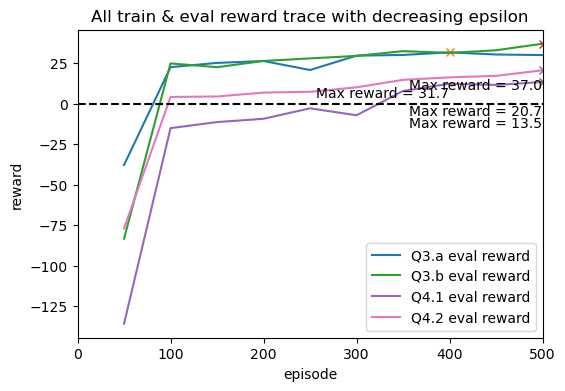

In [107]:
plot_trace_all(['Q3a','Q3b','Q4','Q4b'],['Q3.a','Q3.b','Q4.1','Q4.2'])

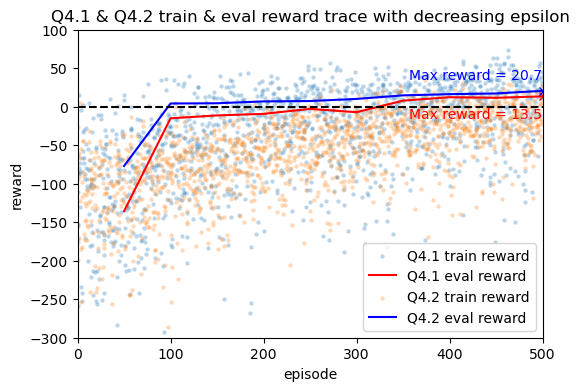

In [102]:
plot_trace_toggle_factor('Q4','Q4b','Q4.1','Q4.2',500,50)

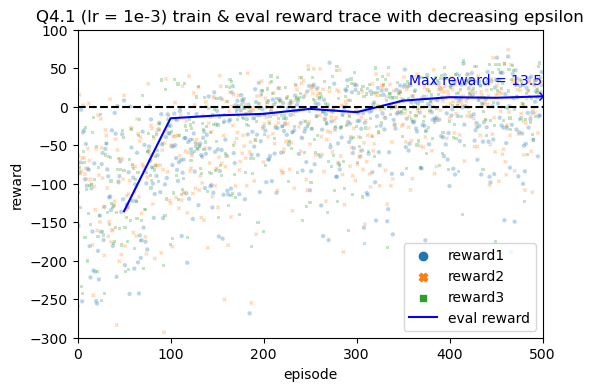

In [44]:
plot_trace('Q4','Q4.1 (lr = 1e-3)',500,50, False)

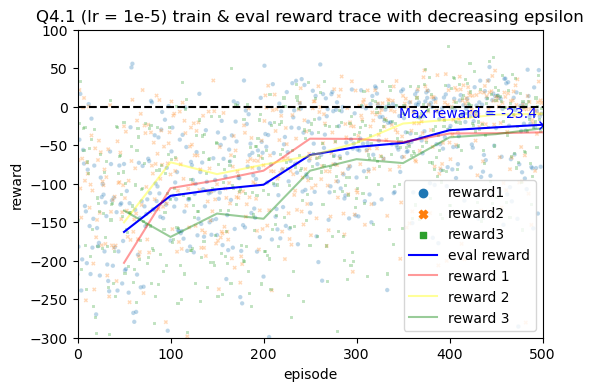

In [61]:
plot_trace('Q4_5','Q4.1 (lr = 1e-5)',500,50, True)

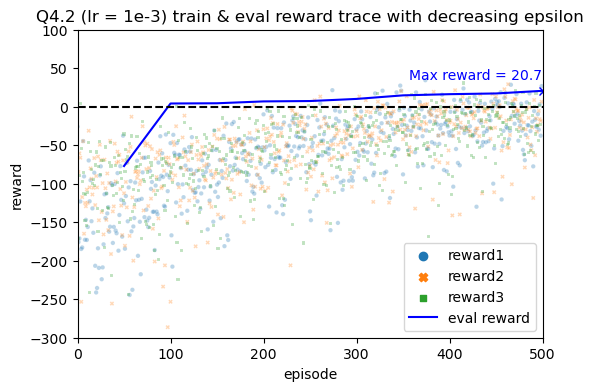

In [45]:
plot_trace('Q4b','Q4.2 (lr = 1e-3)',500,50, False)

In [ ]:
# implement the dqn for me using pytorch and openai gym
import matplotlib.pyplot as plt
from gym import spaces
import json
"""Environment imports"""
from epidemic_env.env       import Env, Log
from epidemic_env.dynamics  import ModelDynamics, Observation
from epidemic_env.visualize import Visualize
from epidemic_env.agent     import Agent

"""Pytorch and numpy imports"""
import numpy as np
import torch
from torch import nn

%matplotlib inline
dyn = ModelDynamics('config/switzerland.yaml')   # load the switzerland map

# get the cuda
# import optimimzer
import torch.optim as optim
import torch.nn.functional as F
import random
import math
from collections import namedtuple
from itertools import count
from IPython import display
from torch.autograd import Variable
from collections import deque
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
action_space        =   spaces.Discrete(2)
observation_space   =   spaces.Box( low=0,
                                    high=1,
                                    shape=(2, dyn.n_cities, dyn.env_step_length),
                                    dtype=np.float16)
print(f"sampled action : {action_space.sample()}")
print("Sampled observation")
plt.matshow(observation_space.sample()[1,:,:])
plt.show()

SCALE = 100
ACTION_NULL = 0
ACTION_CONFINE = 1
ACTION_ISOLATE = 2
ACTION_HOSPITAL = 3
ACTION_VACCINATE = 4



def action_preprocessor(a:torch.Tensor, dyn:ModelDynamics):
    action = { 
        'confinement': False, 
        'isolation': False, 
        'hospital': False, 
        'vaccinate': False,
    }
    
    if a == ACTION_CONFINE:
        action['confinement'] = True
    elif a == ACTION_ISOLATE:
        action['isolation'] = True
    elif a == ACTION_VACCINATE:
        action['vaccinate'] = True
    elif a == ACTION_HOSPITAL:
        action['hospital'] = True
        
    return action
    
def observation_preprocessor(obs: Observation, dyn:ModelDynamics):
    infected = SCALE * np.power(np.array([np.array(obs.city[c].infected)/obs.pop[c] for c in dyn.cities]), 0.25)
    dead = SCALE * np.power( np.array([np.array(obs.city[c].dead)/obs.pop[c] for c in dyn.cities]), 0.25)
    confined = np.ones_like(dead)*int((dyn.get_action()['confinement']))
    return torch.Tensor(np.stack((infected, dead))).unsqueeze(0)

In [ ]:
env_Q3 = Env(  dyn,
            action_space=action_space,
            observation_space=observation_space,
            action_preprocessor=action_preprocessor,
            observation_preprocessor=observation_preprocessor,
            )

In [ ]:
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward')) # define the transition tuple
def int_to_tensor(x):
    return torch.tensor(x, dtype=torch.float32, device=device).unsqueeze(0)

class DQN_Agent_Q3(Agent):
    def __init__(self,  env:Env, epsilon:float = 0.7, batch_size: int = 2048, buffer_size: int = 20000, device = 'cuda', GAMMA : float = 0.9,
                 lr : float = 5e-3, policy_net = None, target_net = None, optimizer = None,
                # Additionnal parameters to be added here
                ):
        self.epsilon = epsilon
        self.env = env
        self.batch_size = batch_size
        self.buffer_size = buffer_size
        self.memory_initial()
        self.device = device
        self.GAMMA = GAMMA
        self.lr = lr
        self.policy_net = policy_net
        self.target_net = target_net
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=self.lr)

    def save_model(self, savepath):
        # This is where one would define the routine for loading a pre-trained model
        torch.save(self.policy_net.state_dict(), savepath)
        pass

    def load_model(self, savepath):
        # This is where one would define the routine for saving the weights for a trained model
        self.policy_net.load_state_dict(torch.load(savepath))
        self.target_net.load_state_dict(self.policy_net.state_dict())
        pass

    def reset(self,):
        # This should be called when the environment is reset
        pass
    
    # the action function for Q3a
    def act(self, obs, temp_epsilon):
        # write the epsilon-greedy policy here
        if random.random() < temp_epsilon:
            return int_to_tensor( self.env.action_space.sample()).unsqueeze(0) 
        else:
            return self.policy_net(obs.to(self.device)).max(1)[1].view(1, 1) # return the action with the highest q-value
    
    # the action functio for Q3b
    def act_decay(self, obs, epsilon0, epsilonmin, Tmax, t):
        temp_epsilon = np.max([epsilon0*(Tmax-t)/Tmax, epsilonmin])
        return self.act(obs, temp_epsilon)
        
    def memory_initial(self):
        # initialize the memory
        self.memory = deque([],maxlen= self.buffer_size) # define the memory as a deque of size capacity

    def memory_push(self, transition):
        # push a transition into the memory
        self.memory.append(transition)

    def memory_sample(self):
        # sample a batch from memory
        return random.sample(self.memory, self.batch_size)
    
    def memory_len(self):
        # return the length of the memory
        return len(self.memory)
    
    def optimize_model(self, train = True):
        # This is where one would define the optimization step of an RL algorithm
        if self.memory_len() < self.batch_size:
            return 0
        transitions = self.memory_sample()

        batch = Transition(*zip(*transitions)) # unzip the batch

        non_final_mask = torch.tensor(tuple(map(lambda s: s is not None, batch.next_state)), device= self.device, dtype=torch.bool).to(device)
        non_final_next_states = torch.cat([s for s in batch.next_state if s is not None]).to(device)

        state_batch = torch.cat(batch.state).to(device)
        
        action_batch = torch.cat(batch.action).to(device)
        reward_batch = torch.cat(batch.reward).squeeze().to(device)

        action_batch = action_batch.long()
        state_action_values = self.policy_net(state_batch).gather(1, action_batch).to(device)
        next_state_values = torch.zeros(self.batch_size, device= self.device)


        with torch.no_grad():
            next_state_values[non_final_mask] = self.target_net(non_final_next_states).max(1)[0]
        # Compute the expected Q values

        expected_state_action_values = (next_state_values * self.GAMMA) + reward_batch
                
        criterion = nn.MSELoss() # define the loss function

        loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))
        
        if train == True:
            # Optimize the model
            self.optimizer.zero_grad()
            loss.backward()
            # In-place gradient clipping
            torch.nn.utils.clip_grad_value_(self.policy_net.parameters(), 100) 
            self.optimizer.step()
        return loss.item()
    
    def update_target_model(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())

In [ ]:
def plot_pic(log):
    """ Parse the logs """
    total = {p:np.array([getattr(l.total,p) for l in log]) for p in dyn.parameters}
    cities = {c:{p:np.array([getattr(l.city[c],p) for l in log]) for p in dyn.parameters} for c in dyn.cities}
    actions = {a:np.array([l.action[a] for l in log]) for a in log[0].action.keys()}

    from matplotlib.ticker import MultipleLocator
    fig = plt.figure(figsize=(14,10))
    ax_leftstate = plt.subplot2grid(shape=(9, 2), loc=(0, 0), rowspan=4)
    ax_leftobs = plt.subplot2grid(shape=(9, 2), loc=(4, 0), rowspan=3)
    ax_leftactions = plt.subplot2grid(shape=(9, 2), loc=(7, 0), rowspan=2)
    ax_right = [plt.subplot2grid(shape=(9, 2), loc=(0, 1), colspan=1)]
    ax_right += [plt.subplot2grid(shape=(9, 2), loc=(i, 1), colspan=1) for i in range(1,9)]
    ax_right = {k:ax_right[_id] for _id,k in enumerate(cities.keys())}

    [ax_leftstate.plot(y) for y in total.values()]
    ax_leftstate.legend(total.keys())
    ax_leftstate.set_title('Full state')
    ax_leftstate.set_ylabel('number of people in each state')

    [ax_leftobs.plot(total[y]) for y in ['infected','dead']]
    ax_leftobs.legend(['infected','dead'])
    ax_leftobs.set_title('Observable state')
    ax_leftobs.set_ylabel('number of people in each state')

    ax_leftactions.imshow(np.array([v for v in actions.values()]).astype(np.uint8),aspect='auto')
    ax_leftactions.set_title('Actions')
    ax_leftactions.set_yticks([0,1,2,3])
    ax_leftactions.set_yticklabels(list(actions.keys()))
    ax_leftactions.set_xlabel('time (in weeks)')

    [ax.plot(cities[c]['infected']) for c, ax in ax_right.items()]
    [ax.plot(cities[c]['dead']) for c, ax in ax_right.items()]
    [ax.set_ylabel(c) for c, ax in ax_right.items()]
    [ax.xaxis.set_major_locator(plt.NullLocator()) for c, ax in ax_right.items()]
    ax_right['Zürich'].set_xlabel('time (in weeks)')
    ax_right['Zürich'].xaxis.set_major_locator(MultipleLocator(2.000))

    fig.tight_layout()
    plt.show()

def play_one_episod(env, DQNagent):
    log2 = []
    finished = False
    obs, info = env.reset(42)

    DQNagent.epsilon = 0
    while not finished:
        action = DQNagent.act(obs,0)
        obs, R, finished, info = env.step(action)
        log2.append(info) # save the information dict for logging
        if finished:
            break

    plot_pic(log2)

In [ ]:
DQNagent = DQN_Agent_Q3()